# COVID-19 Cases Visualization with Seaborn and Matplotlib

This analysis aims to highlight the number of COVID-19 cases in Eastern Europe. The results will be communicated through a visual design produced through Matplotlib and Seaborn.

Shared by: Rini from Kaggle   
Source: Coronavirus Statistics - Worldometer   
Link: https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic

In [1]:
# Import preliminary libraries to inspect the dataset.
import pandas as pd
import numpy as np

# Assign the dataset to 'covid19'
covid19 = pd.read_csv('COVID-19 Coronavirus.csv')

In [2]:
# Inspect the first few rows of the dataset.
covid19.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


## Dataset Modification
The dataset will be modified to clean column names and to place a label on countries that will be highlighted for this analyis.

In [3]:
# Format the Total Cases per 1 million and Total Deaths per 1 million so that their columns are easier to process for the analysis.
covid19.columns = covid19.columns.str.replace('Tot\xa0Cases//1M pop', 'Total Cases per 1 Million')\
.str.replace('Tot\xa0Deaths/1M pop', 'Total Deaths per 1 Million')\
.str.replace('Death percentage', 'Deaths in % of Total Cases')

In [4]:
# Assign the countries to their respective regions. Consolidate the regions through lists.
# Region assignment reference: https://en.wikipedia.org/wiki/Eastern_Europe
central_europe = ['Austria', 'Czech Republic', 'Croatia', 'Hungary', 'Poland', 'Slovakia', 'Slovenia']
balkans = ['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Cyprus', 'Greece', 'Moldova', 'Montenegro', 'North Macedonia', 'Romania', 'Serbia']
baltic_states = ['Estonia', 'Latvia', 'Lithuania']

# Create a list of lists to house all of the list inside 'target_regions'.
target_regions = [central_europe, balkans, baltic_states]

# Create a dictionary to map the countries that will be highlighted. This will separate the target countries from their counterparts.
target_dict = {}
for region in target_regions:
    for country in region:
        target_dict[country] = 'Central/Eastern Europe'

# Map the labels through a new columns called 'Location'.
covid19['Location'] = covid19['Country'].map(target_dict).fillna('Others')
covid19 = covid19.sort_values('Location')

# Inspect the modified dataset.
covid19.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases per 1 Million,Total Deaths per 1 Million,Deaths in % of Total Cases,Location
116,Lithuania,Lithuania,LTU,2655811,Europe,1030966,8907,388193,3354,0.863947,Central/Eastern Europe
164,Romania,Romania,ROU,19013049,Europe,2860094,65090,150428,3423,2.275799,Central/Eastern Europe
160,Poland,Poland,POL,37774045,Europe,5969621,115345,158035,3054,1.932200,Central/Eastern Europe
51,Cyprus,Cyprus,CYP,1222745,Asia,439964,947,359817,774,0.215245,Central/Eastern Europe
178,Serbia,Serbia,SRB,8675762,Europe,1980722,15825,228305,1824,0.798951,Central/Eastern Europe


## Creation of a Visual to Highlight COVID-19 Cases in Eastern Europe
The dataset will now be used to create visual that highlights the high number of cases and deaths of COVID-19 in eastern Europe. Matplotlib and Seaborn will be used. Also, the style from FiveThirtyEight will be used as well.

We will attempt to practice design principles with the use of data-ink maximization and Gestalt Principles.

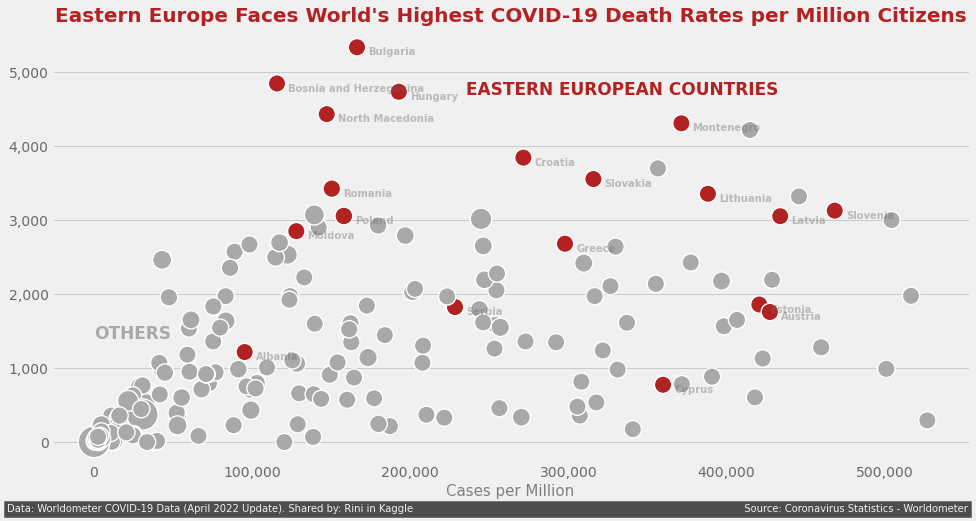

In [13]:
# Import matplotlib and Seaborn.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create a boolean filter to remove outlier countries for this study.
covid19_visual = covid19[(covid19['Total Deaths per 1 Million'] <= 6000) & (covid19['Total Cases per 1 Million'] <= 550000)]

# Implement use of FiveThirtyEight style.
plt.style.use('fivethirtyeight')

# Instantiate a relational plot from Seaborn and place appropriate parameters with respect to data-ink maximization and Gestalt Principles.
sns.relplot(data=covid19_visual,
            x='Total Cases per 1 Million',
            y='Total Deaths per 1 Million',
            hue='Location',
            palette=['firebrick','darkgray'],
            size='Population',
            sizes=(300,1000),
            legend=False,
            height=7,
            aspect=2)

# Create a for-loop to place the names of the countries that are roughly classified as part of Eastern Europe.
for index, row in covid19.iterrows():
    country = row[0]
    if (country in central_europe) or (country in balkans) or (country in baltic_states):
        x_axis = row[7]
        y_axis = row[8]
        plt.text(x=x_axis+7000,
                 y=y_axis-100,
                 s=country,
                 fontsize=10,
                 fontweight='bold',
                 alpha=0.4,
                 color='dimgray')

# Create a title for the graph.
plt.title(label='Eastern Europe Faces World\'s Highest COVID-19 Death Rates per Million Citizens', fontsize=20, color='firebrick', fontweight='bold')

# Include a text highlighting the number of Eastern European countries on top of the graph.
plt.text(x=235000,y=4700,s='EASTERN EUROPEAN COUNTRIES', color='firebrick', fontsize=17, fontweight='bold')

# Include a text mentioning the other countries not highlighted in this analysis.
plt.text(x=0,y=1400,s='OTHERS', color='darkgray', fontsize=17, fontweight='bold')

# Include an annotation to cite the sources.
plt.annotate(text='Data: Worldometer COVID-19 Data (April 2022 Update). Shared by: Rini in Kaggle' + ' '*106 + 'Source: Coronavirus Statistics - Worldometer',
             xy=(-45,-50),
             xycoords='axes points',
             color = '#f0f0f0',
             backgroundcolor = '#4d4d4d',
             size=10)

# Remove the vertical grid lines for a 'cleaner' look.
plt.grid(visible=None, axis='x')

# Place the tick labels for better understanding and appreciation of the figures in this study.
plt.xticks(ticks=[0, 100000, 200000, 300000, 400000, 500000], labels=['0', '100,000', '200,000', '300,000', '400,000', '500,000'], fontsize=14, color='dimgray')
plt.yticks(ticks=[0, 1000, 2000, 3000, 4000, 5000], labels=['0', '1,000', '2,000', '3,000', '4,000', '5,000'], fontsize=14, color='dimgray')

# Include an x-axis label to understand the labels on the x-axis.
plt.xlabel('Cases per Million', color='gray', fontsize=15)

# Remove the y-axis label since the numbers are already explained by the title.
plt.ylabel('')

# Show the result.
plt.show()